In [1]:
import networkx as nx
import pandas as pd
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
import ndlib.models.ModelConfig as mc
from ndlib.viz.bokeh.MultiPlot import MultiPlot
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import mannwhitneyu, wilcoxon
from itertools import product

In [ ]:
# Helper functions

def config_SIR(model, beta, gamma, fraction_infected):
    '''Takes the SIR model as input and its parameters
    Configures said model with these parameters.'''
    config = mc.Configuration()
    config.add_model_parameter('beta', beta)
    config.add_model_parameter('gamma', gamma)
    config.add_model_parameter("fraction_infected", fraction_infected)
    model.set_initial_status(config)
    
    
def get_SIR_result_lists(results):
    '''Takes SIR simulation results (model.build_trends(iterations)) as input variable
    Unpacks this variable and outputs S, I, R node count as lists.'''
    S_node_count = results[0]['trends']['node_count'][0]
    I_node_count = results[0]['trends']['node_count'][1]
    R_node_count = results[0]['trends']['node_count'][2]
    return S_node_count, I_node_count, R_node_count

**Investigate the effect of network parameters on the spread**

In [ ]:
#Simulate Erdos-Reyni (random) network. Investigate the effect of p on the spread of disease (SIR).

p_variations = [0.04, 0.07, 0.1, 0.13, 0.16]
beta = 0.001
gamma = 0.01
fraction_infected = 0.05
time_steps = 200
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for p in p_variations:
    # Network Definition
    g = nx.erdos_renyi_graph(N, p)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'p = {p}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter p on the spread of disease (SIR)\nin the Erdos-Reyni (random) network')
    plt.legend()
    plt.grid(True)

In [ ]:
#Simulate Barabasi Albert (scale-free) network. Investigate the effect of m on the spread of disease (SIR).

m_variations = [1, 2, 3, 4, 5]
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for m in m_variations:
    # Network Definition
    g = nx.barabasi_albert_graph(N, m)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'm = {m}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter m on the spread of disease (SIR)\nin the Barabasi Albert (scale-free) network')
    plt.legend()
    plt.grid(True)

In [ ]:
#Simulate Watts-Strogatz (small worlds) network. Investigate the effect of k on the spread of disease (SIR).

k_variations = [5, 7, 9, 11, 13]
prob = 0.05
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for k in k_variations:
    # Network Definition
    g = nx.watts_strogatz_graph(N, k, prob)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'm = {k}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter k on the spread of disease (SIR)\nin the Watts-Strogatz (small worlds) network')
    plt.legend()
    plt.grid(True)
    
    
#Simulate Watts-Strogatz (small worlds) network. Investigate the effect of p (prob) on the spread of disease (SIR).

k = 5
prob_variations = [0.05, 0.10, 0.15, 0.25]
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for prob in prob_variations:
    # Network Definition
    g = nx.watts_strogatz_graph(N, k, prob)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'p = {prob}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter p on the spread of disease (SIR)\nin the Watts-Strogatz (small worlds) network')
    plt.legend()
    plt.grid(True)

**Generate Networks of equivalent form**

## Vaccination

In [2]:
# Read your data into a Pandas DataFrame
data = pd.read_csv('transmission_network.csv', delimiter=';')

In [3]:
print(data.shape)

(374, 375)


In [4]:
data = data.drop(columns=['Unnamed: 0'])  # Remove the extra column
adjacency_matrix = data.values

In [5]:
G = nx.Graph(adjacency_matrix)

In [6]:
print("Number of nodes:", len(G.nodes()))
print("Number of edges:", len(G.edges()))

Number of nodes: 374
Number of edges: 1265


In [ ]:
# Create a layout for the graph
layout = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw(G, layout, with_labels=True, node_size=300, node_color='skyblue', font_size=8)

# Draw edge weights, if available
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, layout, edge_labels=labels, font_size=8)

# Show the graph
plt.title("Your Network Graph")
plt.show()

In [7]:
node_degrees = dict(G.degree())

In [8]:
type(node_degrees)

dict

In [9]:
sorted_nodes = sorted(node_degrees, key=lambda x: node_degrees[x], reverse=True)


In [10]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Define a threshold for identifying hub nodes
threshold = 0.35 # Adjust the threshold as needed

# Identify hub nodes based on centrality measures and threshold
hub_nodes = [node for node in G.nodes() if (degree_centrality[node] > threshold or
                                           closeness_centrality[node] > threshold or
                                           betweenness_centrality[node] > threshold)]

print("Hub Nodes:", hub_nodes)

Hub Nodes: [8, 9, 10, 12, 13, 16, 20, 34, 35, 38, 66, 67, 71, 76, 83, 87, 105, 133, 178, 262, 277, 289, 313]


Number of nodes: 374
Number of edges: 1265
Network density: 0.018135940703359093
Average degree: 6.764705882352941
Average clustering coefficient: 0.2959852276749502
Average shortest path length for component: 3.3638065972055506
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 1.0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 1.0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length for component: 0
Average shortest path length fo

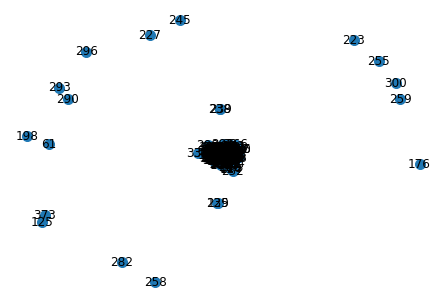

In [11]:
# Basic Network Statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network density: {density}")

# Degree Distribution
degree_sequence = [d for n, d in G.degree()]
avg_degree = sum(degree_sequence) / num_nodes

print(f"Average degree: {avg_degree}")

# Clustering Coefficient
avg_clustering = nx.average_clustering(G)

print(f"Average clustering coefficient: {avg_clustering}")

if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_shortest_path}")
else:
    # If the graph is not connected, compute the average shortest path for each component
    for component in nx.connected_components(G):
        subgraph = G.subgraph(component)
        avg_shortest_path = nx.average_shortest_path_length(subgraph)
        print(f"Average shortest path length for component: {avg_shortest_path}")
# Community Detection (using the Louvain algorithm)
from community import best_partition
partition = best_partition(G)

# Visualization (you can adjust parameters for your specific network)
# Note: Visualization works best for small to moderately-sized networks
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100)
plt.show()

In [12]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Print the results
print(f"Degree Distribution: {degree_sequence}")
print(f"Average Clustering Coefficient: {clustering_coefficient}")
print(f"Degree Centrality: {degree_centrality}")
print(f"Betweenness Centrality: {betweenness_centrality}")

Degree Distribution: [47, 38, 36, 33, 33, 28, 27, 26, 25, 24, 24, 23, 23, 23, 23, 23, 22, 21, 20, 20, 20, 20, 20, 19, 18, 18, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 

# Null Strategy

In [13]:
# Assuming adjacency_matrix is a NumPy array representing the adjacency matrix
G = nx.Graph(adjacency_matrix)

In [14]:
# Parameters
vaccination_budgets = [1, 3, 5, 10]
transmission_probability = 0.35
total_tests = 100
num_experiments = 10

def run_null_simulation(G, initial_infected, vaccination_budget, transmission_probability):
    # Initialize the status of nodes: 0 for susceptible, 1 for infected, and 2 for removed
    node_status = {node: 0 for node in G.nodes()}

    # Select a random initial set of infected nodes
    initial_infected_nodes = random.sample(list(G.nodes()), initial_infected)
    for node in initial_infected_nodes:
        node_status[node] = 1

    # Lists to store SIR counts at each step
    infected_counts = []
    susceptible_counts = []
    removed_counts = []

    for _ in range(total_tests):
        # Calculate the number of remaining vaccinations that can be performed in this iteration
        remaining_vaccinations = min(vaccination_budget, sum(1 for node in G.nodes() if node_status[node] == 0))
        # Perform vaccination with the remaining budget
        vaccinated_nodes = random.sample([node for node in G.nodes() if node_status[node] == 0], remaining_vaccinations)
        for node in vaccinated_nodes:
            node_status[node] = 2  # Move to the removed state

        # Disease spread: Infected nodes can infect susceptible neighbors
        for node in G.nodes():
            if node_status[node] == 1:  # Node is infected
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if node_status[neighbor] == 0 and random.random() <= transmission_probability:
                        node_status[neighbor] = 1  # Neighbor becomes infected

        # Calculate SIR counts at this step
        infected_count = sum(1 for status in node_status.values() if status == 1)
        susceptible_count = sum(1 for status in node_status.values() if status == 0)
        removed_count = sum(1 for status in node_status.values() if status == 2)

        infected_counts.append(infected_count)
        susceptible_counts.append(susceptible_count)
        removed_counts.append(removed_count)

    # Return the SIR counts for this simulation
    return infected_counts, susceptible_counts, removed_counts


# Dictionary to store the average SIR counts for each combination
average_sir_data = {}

for vaccination_budget in vaccination_budgets:
    # Initialize average SIR counts for this combination
    average_infected_counts = [0] * total_tests
    average_susceptible_counts = [0] * total_tests
    average_removed_counts = [0] * total_tests

    for _ in range(num_experiments):
        infected_counts, susceptible_counts, removed_counts = run_null_simulation(G, initial_infected=5, vaccination_budget=vaccination_budget, transmission_probability=transmission_probability)
        average_infected_counts = [x + y for x, y in zip(average_infected_counts, infected_counts)]
        average_susceptible_counts = [x + y for x, y in zip(average_susceptible_counts, susceptible_counts)]
        average_removed_counts = [x + y for x, y in zip(average_removed_counts, removed_counts)]

    # Calculate the average SIR counts for this combination
    average_infected_counts = [count / num_experiments for count in average_infected_counts]
    average_susceptible_counts = [count / num_experiments for count in average_susceptible_counts]
    average_removed_counts = [count / num_experiments for count in average_removed_counts]

    # Store the average SIR counts in the dictionary
    average_sir_data[vaccination_budget] = (average_infected_counts, average_susceptible_counts, average_removed_counts)

# Create a table of average SIR counts per iteration
sir_table = pd.DataFrame()

for vaccination_budget, (infected_counts, susceptible_counts, removed_counts) in average_sir_data.items():
    # Create a row label
    row_label = f"Vaccination Budget: {vaccination_budget}"
    sir_table[row_label + " - Infected"] = infected_counts
    sir_table[row_label + " - Susceptible"] = susceptible_counts
    sir_table[row_label + " - Removed"] = removed_counts

# Output the table to a CSV file
sir_table.to_csv("average_sir_counts_null_no_test.csv", index=False)

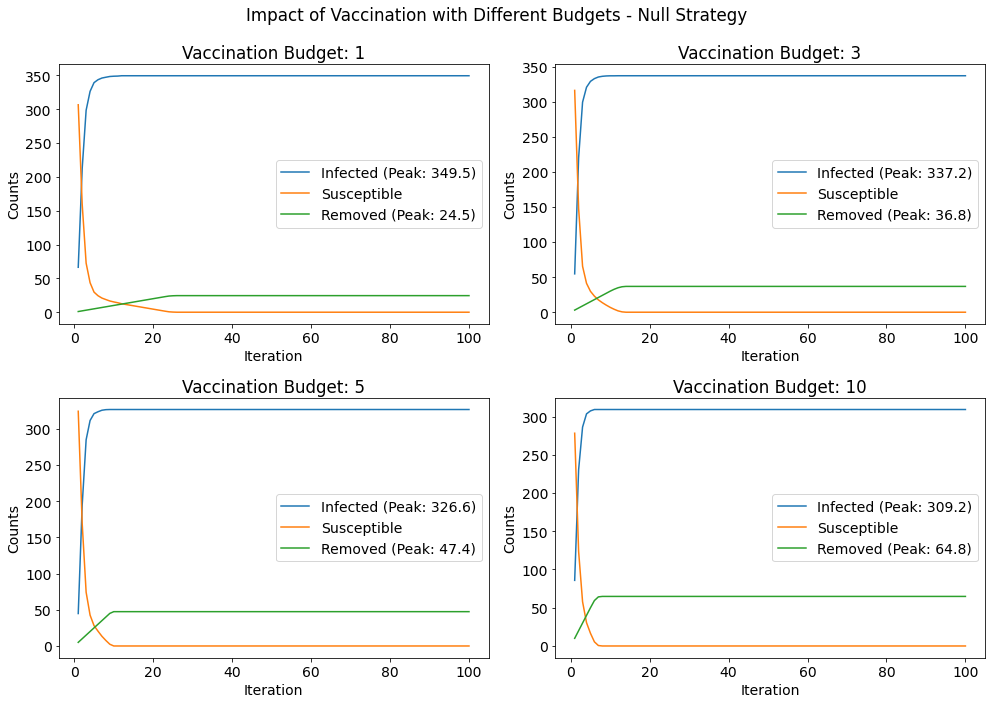

In [17]:
# Set the font size
plt.rc('font', size=14)

# Load the data from the CSV file
data = pd.read_csv('average_sir_counts_null_no_test.csv')

# Define the list of vaccination budgets
vaccination_budgets = [1, 3, 5, 10]

# Create a grid of subplots for different vaccination budgets (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Impact of Vaccination with Different Budgets - Null Strategy')

for i, vaccination_budget in enumerate(vaccination_budgets):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    
    # Construct the column names based on the vaccination budget
    infected_column = f'Vaccination Budget: {vaccination_budget} - Infected'
    susceptible_column = f'Vaccination Budget: {vaccination_budget} - Susceptible'
    removed_column = f'Vaccination Budget: {vaccination_budget} - Removed'

    # Extract the data for the specified vaccination budget
    infected = data[infected_column]
    susceptible = data[susceptible_column]
    removed = data[removed_column]

    # Create a line plot in the current subplot
    axes[row, col].plot(range(1, len(infected) + 1), infected, label='Infected')
    axes[row, col].plot(range(1, len(susceptible) + 1), susceptible, label='Susceptible')
    axes[row, col].plot(range(1, len(removed) + 1), removed, label='Removed')

    # Add "Peak Infected" and "Peak Removed" to the legend
    peak_infected = max(infected)
    peak_removed = max(removed)
    axes[row, col].legend([f'Infected (Peak: {peak_infected})', f'Susceptible', f'Removed (Peak: {peak_removed})'])

    axes[row, col].set_title(f'Vaccination Budget: {vaccination_budget}')

    # Label x and y axes
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Counts')

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.savefig('Null_strategy.png')
plt.show()


# Dynamic Vacciantion

In [24]:
# Parameters
vaccination_budgets = [1, 3, 5, 10]
transmission_probability = 0.35
max_tests_per_iteration = 20  # Maximum number of tests per iteration
num_experiments = 10
total_tests = 100
G = nx.Graph(adjacency_matrix)

# Function to run a single simulation with testing and vaccination
def run_custom_simulation(G, initial_infected, vaccination_budget, testing_accuracy, transmission_probability, max_tests_per_iteration):
    # Initialize the status of nodes: 0 for susceptible, 1 for infected, and 2 for removed
    node_status = {node: 0 for node in G.nodes()}
    false_positives = 0  # Initialize false positives count

    # Calculate the combined centrality score for each node
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    combined_centrality = {node: (degree_centrality[node] + betweenness_centrality[node]) for node in G.nodes()}

    # Rank nodes based on the combined centrality score
    ranked_nodes = sorted(G.nodes(), key=lambda node: -combined_centrality[node])

    # Select a random initial set of infected nodes
    initial_infected_nodes = random.sample(ranked_nodes, initial_infected)
    for node in initial_infected_nodes:
        node_status[node] = 1

    # Lists to store SIR counts at each step
    infected_counts = []
    susceptible_counts = []
    removed_counts = []

    for _ in range(total_tests):
        # Calculate the number of remaining vaccinations that can be performed in this iteration
        remaining_vaccinations = min(vaccination_budget, sum(1 for node in G.nodes() if node_status[node] == 0))
        
        # Perform testing to understand disease status
        tested_nodes = [node for node in G.nodes() if node_status[node] == 0]
        
        # Limit the number of tests in this iteration to the specified maximum
        tested_nodes = random.sample(tested_nodes, min(max_tests_per_iteration, len(tested_nodes)))
        
        for node in tested_nodes:
            if random.random() <= testing_accuracy:
                if node_status[node] == 1:
                    node_status[node] = 1  # Accurate test result: Node is infected
                else:
                    node_status[node] = 0  # Accurate test result: Node is still susceptible
            else:
                if node_status[node] == 1:
                    node_status[node] = 0  # Inaccurate test result: Node is still susceptible
                else:
                    node_status[node] = 0  # Inaccurate test result: Node is still susceptible
                    false_positives += 1  # Increment false positives count

        # Prioritize vaccination of high-degree nodes
        vaccinated_nodes = [node for node in ranked_nodes if node_status[node] == 0][:remaining_vaccinations]
        
        # Perform vaccinations and update node status
        for node in vaccinated_nodes:
            node_status[node] = 2  # Move to the removed state

        # Disease spread: Infected nodes can infect susceptible neighbors
        for node in G.nodes():
            if node_status[node] == 1:  # Node is infected
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if node_status[neighbor] == 0 and random.random() <= transmission_probability:
                        node_status[neighbor] = 1  # Neighbor becomes infected

        # Calculate SIR counts at this step
        infected_count = sum(1 for status in node_status.values() if status == 1)
        susceptible_count = sum(1 for status in node_status.values() if status == 0)
        removed_count = sum(1 for status in node_status.values() if status == 2)

        infected_counts.append(infected_count)
        susceptible_counts.append(susceptible_count)
        removed_counts.append(removed_count)

    return infected_counts, susceptible_counts, removed_counts, false_positives

# Dictionary to store the average SIR counts for each combination
average_sir_data = {}

for vaccination_budget in vaccination_budgets:
    for testing_accuracy in [0.5, 0.75, 1.0]:
        # Initialize average SIR counts for this combination
        average_infected_counts = [0] * total_tests
        average_susceptible_counts = [0] * total_tests
        average_removed_counts = [0] * total_tests
        total_false_positives = 0  # Initialize total false positives count

        for _ in range(num_experiments):
            infected_counts, susceptible_counts, removed_counts, false_positives = run_custom_simulation(G, initial_infected=5, vaccination_budget=vaccination_budget, testing_accuracy=testing_accuracy, transmission_probability=transmission_probability, max_tests_per_iteration=max_tests_per_iteration)
            average_infected_counts = [x + y for x, y in zip(average_infected_counts, infected_counts)]
            average_susceptible_counts = [x + y for x, y in zip(average_susceptible_counts, susceptible_counts)]
            average_removed_counts = [x + y for x, y in zip(average_removed_counts, removed_counts)]
            total_false_positives += false_positives

        # Calculate the average SIR counts for this combination
        average_infected_counts = [count / num_experiments for count in average_infected_counts]
        average_susceptible_counts = [count / num_experiments for count in average_susceptible_counts]
        average_removed_counts = [count / num_experiments for count in average_removed_counts]

        # Calculate the average false positives for this combination
        average_false_positives = total_false_positives / num_experiments

        # Store the average SIR counts and average false positives in the dictionary
        average_sir_data[(vaccination_budget, testing_accuracy)] = (average_infected_counts, average_susceptible_counts, average_removed_counts, average_false_positives)

# Create a table of average SIR counts and average false positives per iteration
sir_table = pd.DataFrame()

for (vaccination_budget, testing_accuracy), (infected_counts, susceptible_counts, removed_counts, false_positives) in average_sir_data.items():
    # Create a row label
    row_label = f"Vaccination Budget: {vaccination_budget}, Testing Accuracy: {testing_accuracy}"
    sir_table[row_label + " - Infected"] = infected_counts
    sir_table[row_label + " - Susceptible"] = susceptible_counts
    sir_table[row_label + " - Removed"] = removed_counts
    sir_table[row_label + " - False Positives"] = [false_positives] * total_tests  # Add the average false positives

# Output the table to a CSV file
sir_table.to_csv("average_sir_better_vacc.csv", index=False)


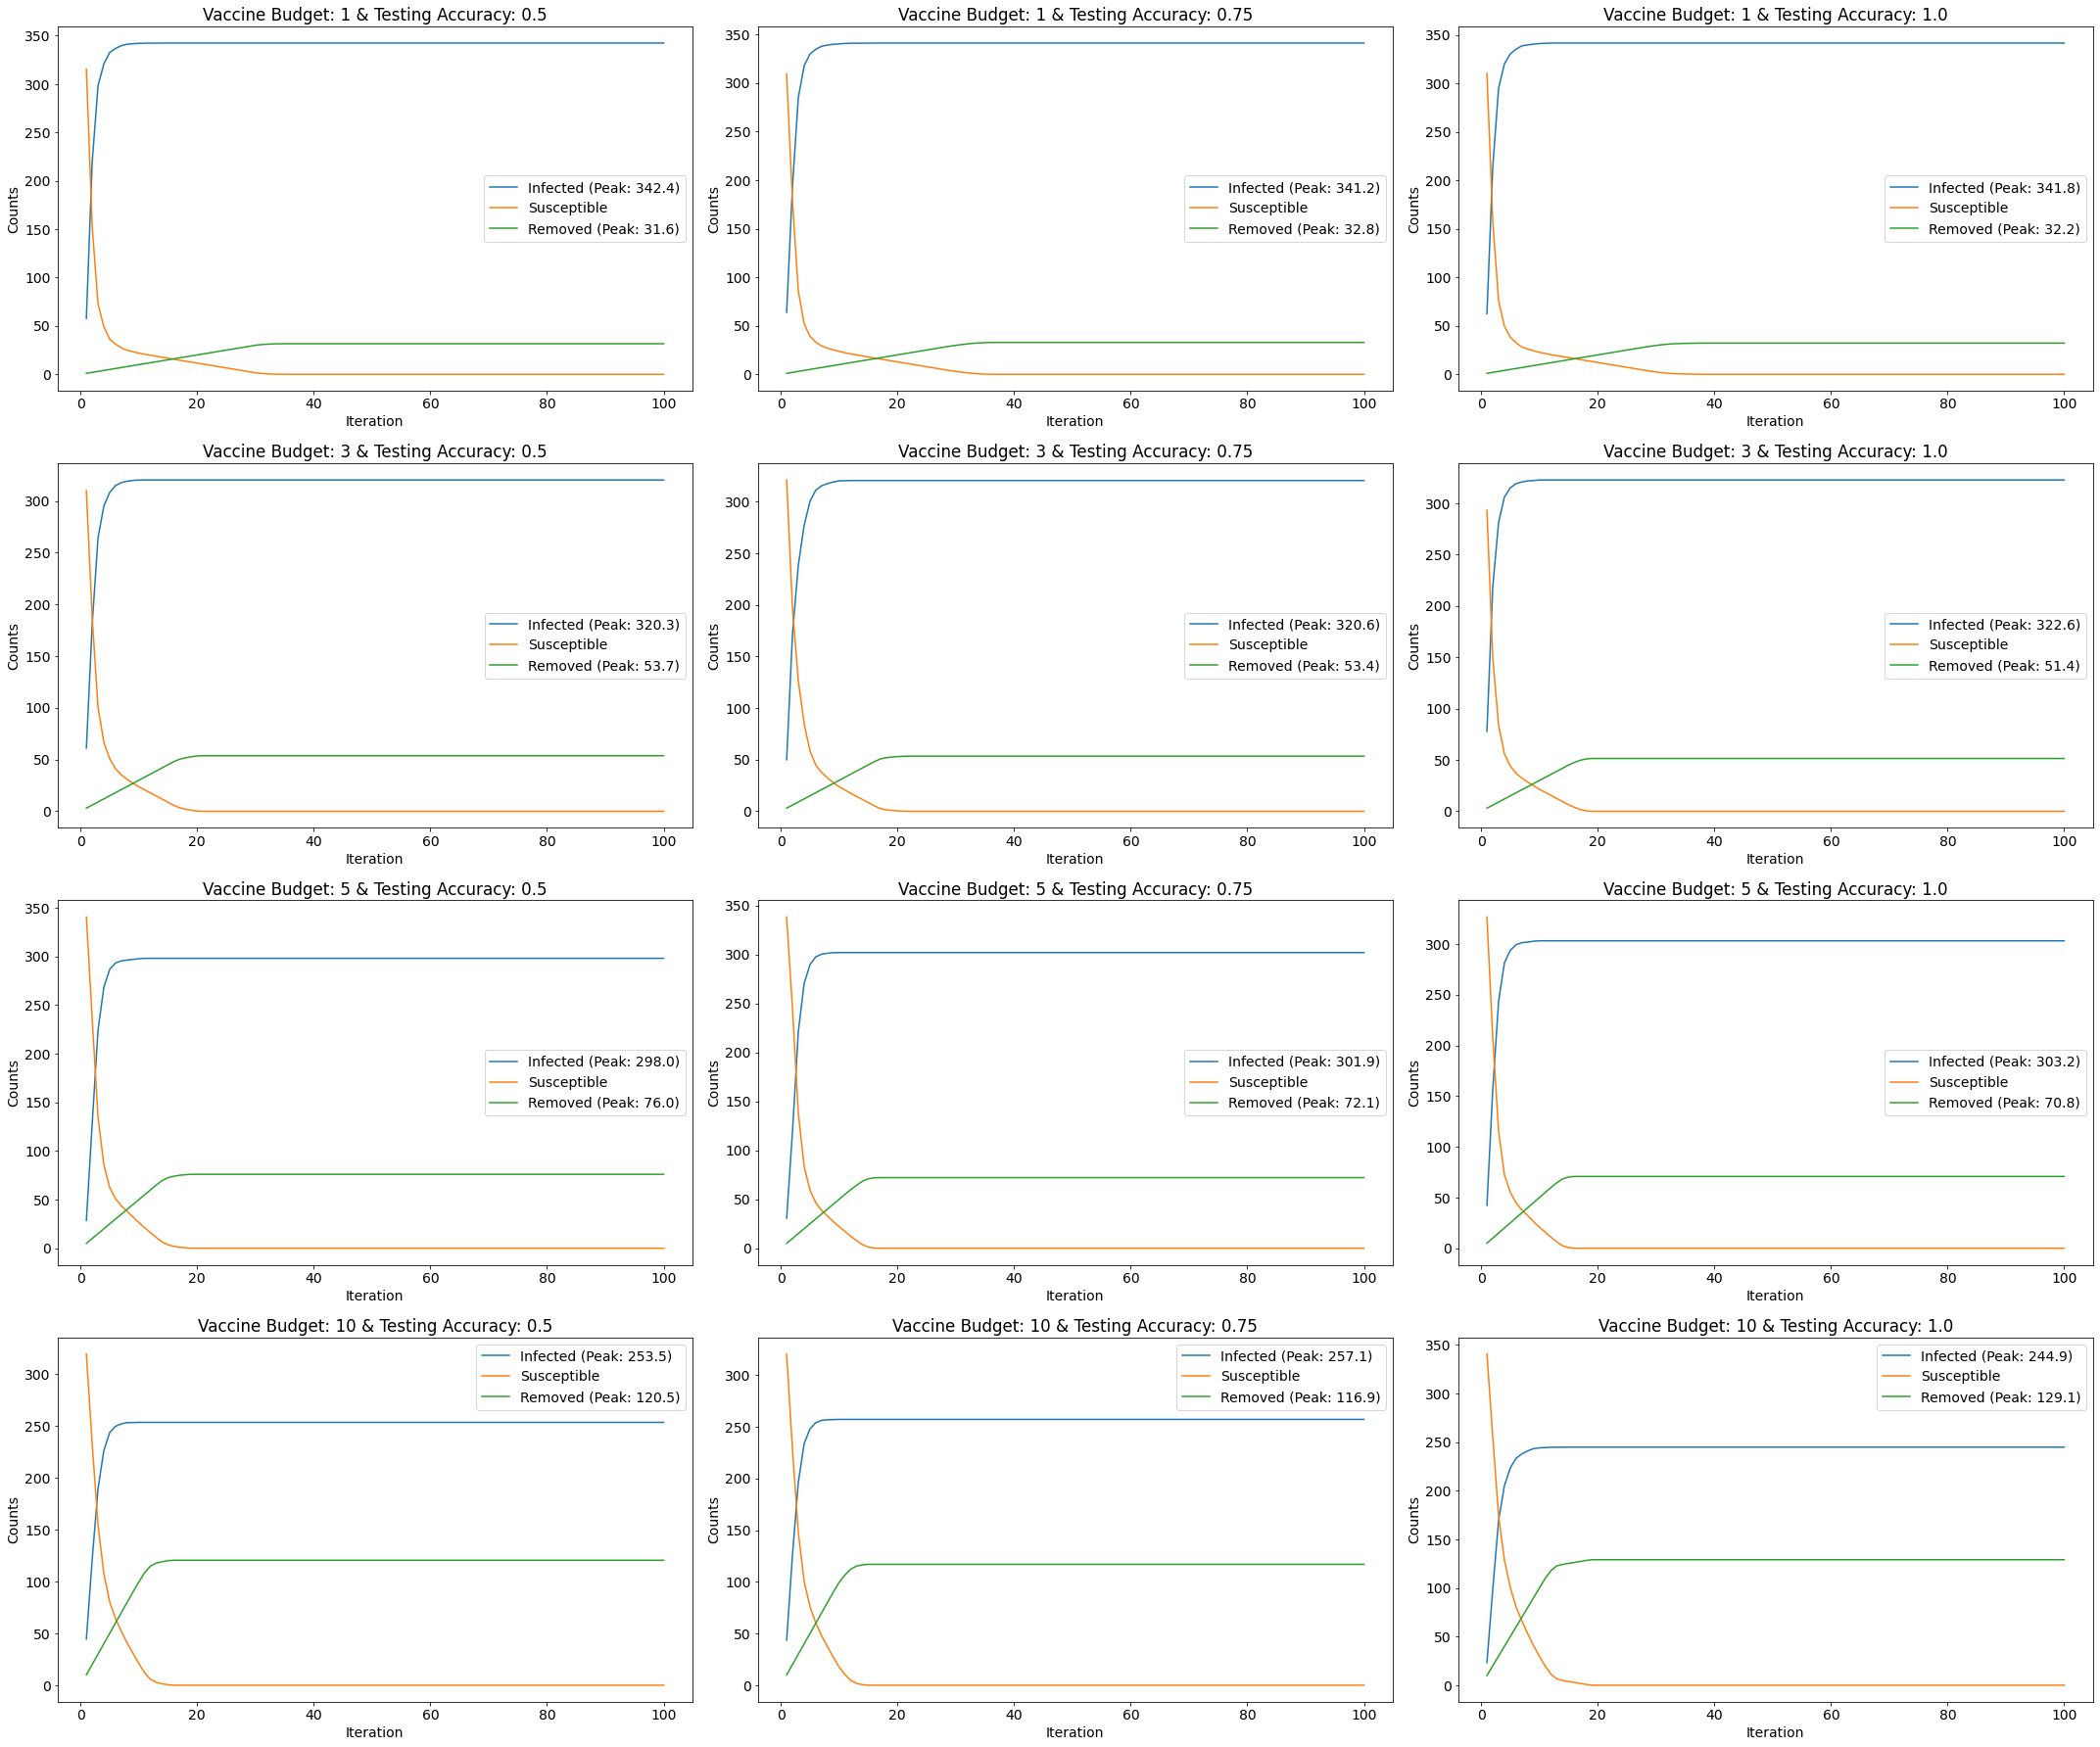

In [33]:
# Load the data from the CSV file
data = pd.read_csv('average_sir_better_vacc.csv')

# Define the list of vaccination budgets and testing accuracies
vaccination_budgets = [1, 3, 5, 10]
testing_accuracies = [0.5, 0.75, 1.0]

# Create a grid of subplots for different combinations
fig, axes = plt.subplots(len(vaccination_budgets), len(testing_accuracies), figsize=(30, 25))

for i, vaccination_budget in enumerate(vaccination_budgets):
    for j, testing_accuracy in enumerate(testing_accuracies):
        # Construct the column names based on the combination
        infected_column = f'Vaccination Budget: {vaccination_budget}, Testing Accuracy: {testing_accuracy} - Infected'
        susceptible_column = f'Vaccination Budget: {vaccination_budget}, Testing Accuracy: {testing_accuracy} - Susceptible'
        removed_column = f'Vaccination Budget: {vaccination_budget}, Testing Accuracy: {testing_accuracy} - Removed'

        # Extract the data for the specified combination
        infected = data[infected_column]
        susceptible = data[susceptible_column]
        removed = data[removed_column]

        # Create a line plot in the current subplot
        axes[i, j].plot(range(1, len(infected) + 1), infected, label='Infected')
        axes[i, j].plot(range(1, len(susceptible) + 1), susceptible, label='Susceptible')
        axes[i, j].plot(range(1, len(removed) + 1), removed, label='Removed')

        peak_infected = max(infected)
        peak_removed = max(removed)
        axes[i, j].legend([f'Infected (Peak: {peak_infected})', f'Susceptible', f'Removed (Peak: {peak_removed})'])
        
        axes[i, j].set_title(f'Vaccine Budget: {vaccination_budget} & Testing Accuracy: {testing_accuracy}')
        axes[i, j].set_xlabel('Iteration')
        axes[i, j].set_ylabel('Counts')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

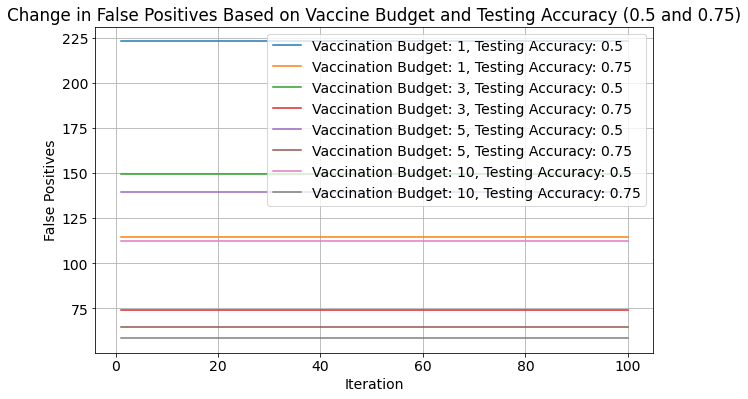

In [26]:
# Load the data from the CSV file
false_positives_data = pd.read_csv("average_sir_better_vacc.csv")

# Filter columns for testing accuracies 0.5 and 0.75
filtered_columns = [col for col in false_positives_data.columns if "False Positives" in col and ("0.5" in col or "0.75" in col)]

# Plot the results
plt.figure(figsize=(10, 6))
for col in filtered_columns:
    label = col.replace(" - False Positives", "")
    plt.plot(range(1, len(false_positives_data) + 1), false_positives_data[col], label=label)

plt.xlabel("Iteration")
plt.ylabel("False Positives")
plt.legend()
plt.title("Change in False Positives Based on Vaccine Budget and Testing Accuracy (0.5 and 0.75)")
plt.grid(True)
plt.show()

# Statistical Testing

In [46]:
# Load the data from the CSV files
data_null = pd.read_csv('average_sir_counts_null_no_test.csv')
data_dynamic = pd.read_csv('average_sir_better_vacc.csv')

# Define the vaccination budgets and testing accuracies
vaccination_budgets = [1, 3, 5, 10]
testing_accuracies = [0.5, 0.75, 1.0]

# Create a list to store the results
results_list = []

# Perform Mann-Whitney U tests for each combination
for budget, accuracy in product(vaccination_budgets, testing_accuracies):
    null_col = f'Vaccination Budget: {budget} - Infected'
    dynamic_col = f'Vaccination Budget: {budget}, Testing Accuracy: {accuracy} - Infected'

    u_statistic, p_value = mannwhitneyu(data_null[null_col], data_dynamic[dynamic_col])
    # Format the p-value to 3 significant figures
    formatted_p_value = f'{p_value:.3g}'
    
    results_list.append({
        'Null Column': null_col,
        'Dynamic Column': dynamic_col,
        'P-Value': formatted_p_value
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results_list)

# Save the results to a CSV file without the U statistic
results_df.to_csv('mannwhitneyu_results.csv', index=False, columns=['Null Column', 'Dynamic Column', 'P-Value'])

In [45]:
# Define the list of vaccination budgets and testing accuracies
vaccination_budgets = [1, 3, 5, 10]
testing_accuracies = [0.5, 0.75, 1.0]

# Create a list to store the results
results = []

# Iterate through all combinations
for budget in vaccination_budgets:
    for accuracy1 in testing_accuracies:
        for accuracy2 in testing_accuracies:
            if accuracy1 < accuracy2:
                # Extract data for the current budget and accuracies
                col1 = f'Vaccination Budget: {budget}, Testing Accuracy: {accuracy1} - Infected'
                col2 = f'Vaccination Budget: {budget}, Testing Accuracy: {accuracy2} - Infected'
                data1 = data_dynamic[col1]
                data2 = data_dynamic[col2]
                
                # Perform the Wilcoxon test for the current pair of groups
                statistic, p_value = wilcoxon(data1, data2)
                formatted_p_value = f'{p_value:.3g}'
       
                # Append the results to the list
                results.append({
                    'Vaccination Budget': budget,
                    'Test Accuracy 1': accuracy1,
                    'Test Accuracy 2': accuracy2,
                    'P-Value': formatted_p_value
                })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('wilcoxon_test_results.csv', index=False)
